In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [3]:
df=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
df.describe() 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
#check for missing values
df.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [8]:
#Correlation Matrix
df.corr() 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
#Scatterplot between variables along with histograms

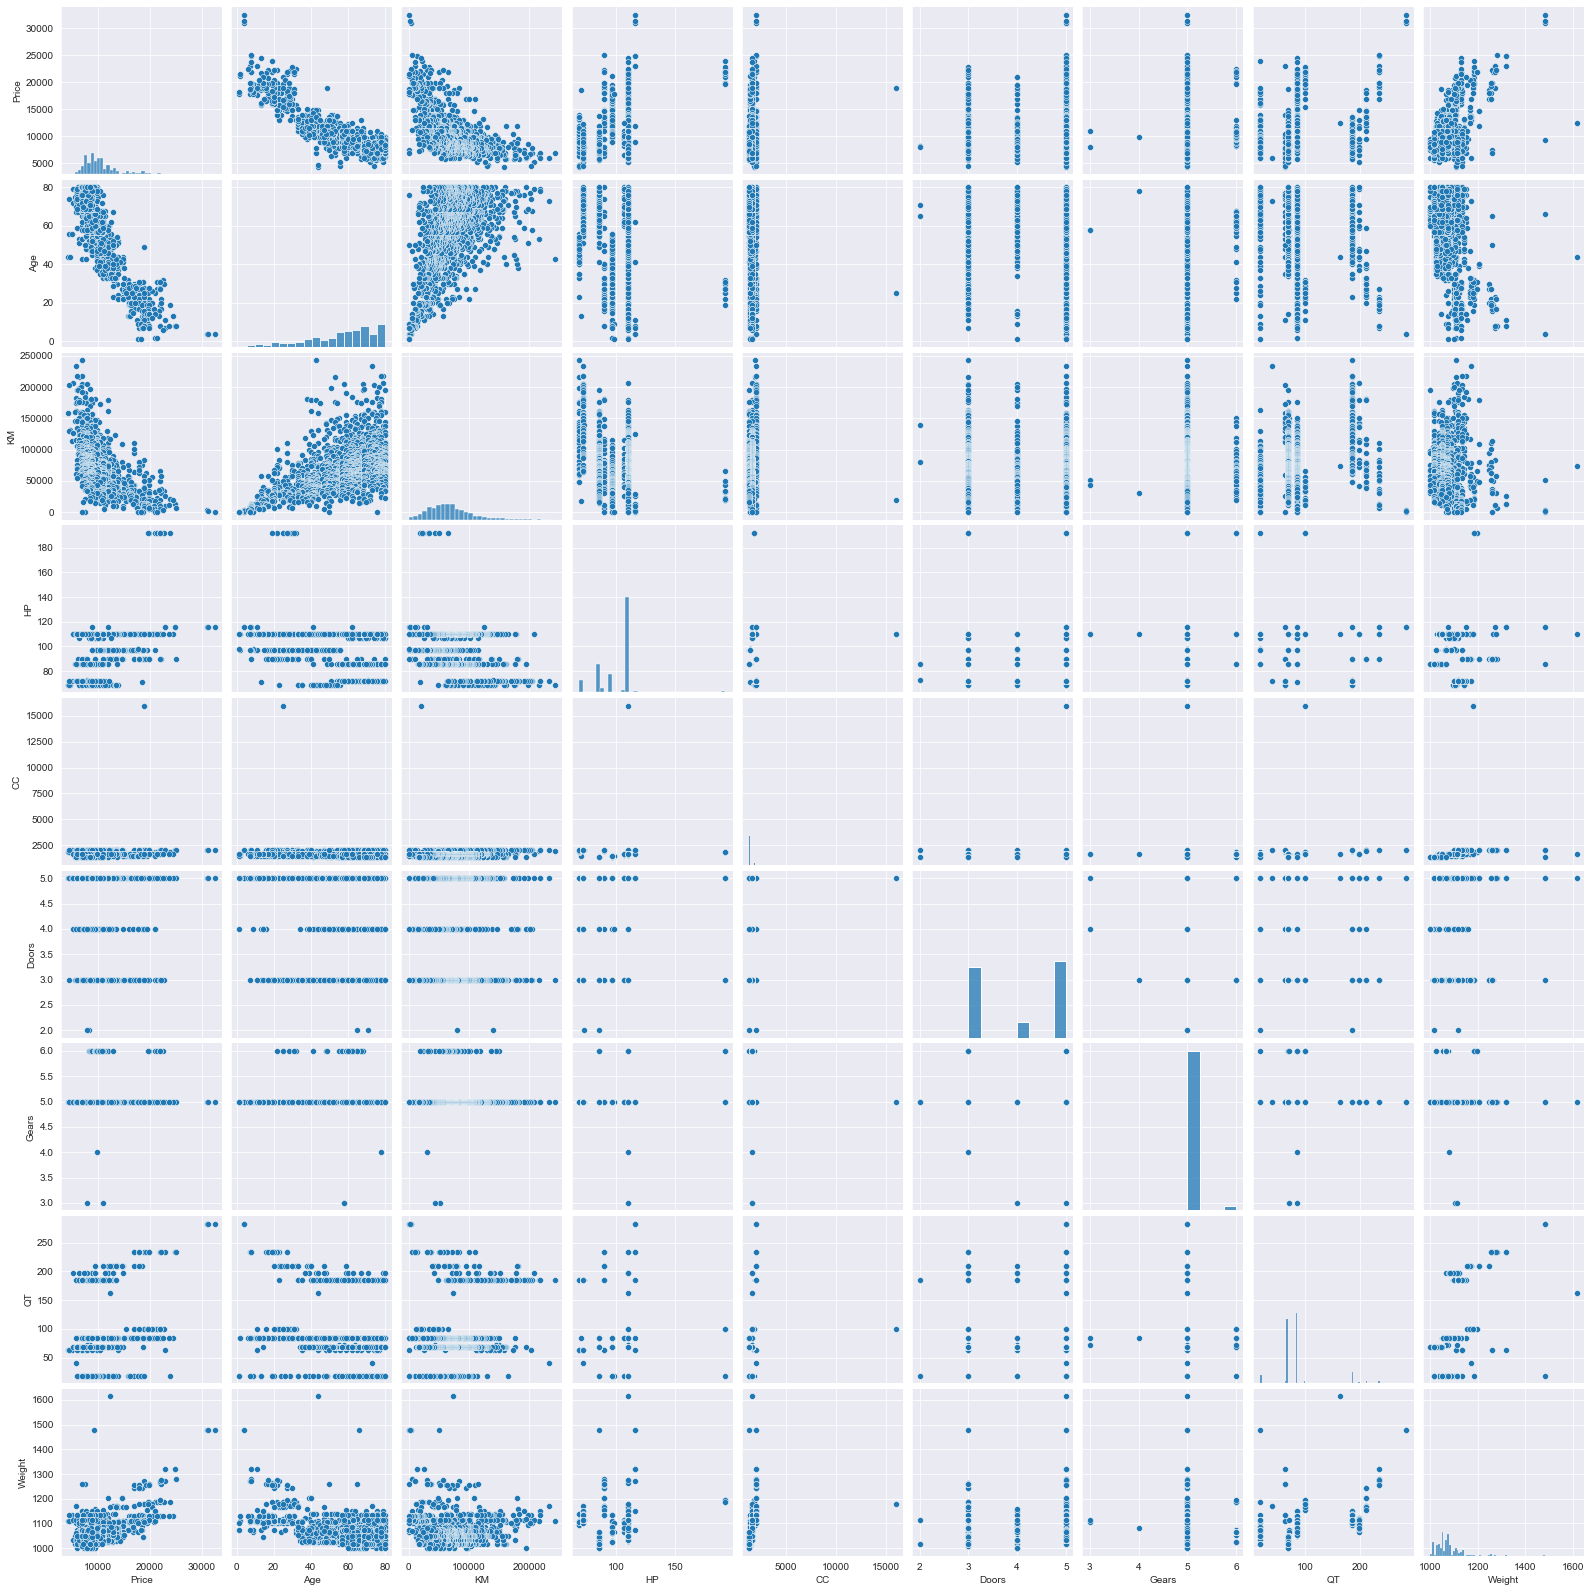

In [10]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [11]:
#Preparing a model
#Build model

In [12]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()

In [13]:
#Coefficients
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:21:32   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

##### t and p-Values
print(model.tvalues, '\n', model.pvalues)

In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [16]:
ml_v=smf.ols('Price~CC',data = df).fit()   
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    24.694090
CC            4.824822
dtype: float64 
 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


In [17]:
ml_v=smf.ols('Price~Doors',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [18]:
ml_v=smf.ols('Price~CC+Doors',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    12.620704
CC            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
CC           1.521992e-05
Doors        1.373469e-11
dtype: float64


In [19]:
rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df).fit().rsquared
vif_WT=1/(1-rsq_WT)

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)


d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df



,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


In [20]:
#Residual Analysis

In [21]:
#Test for Normality of Residuals (Q-Q Plot)

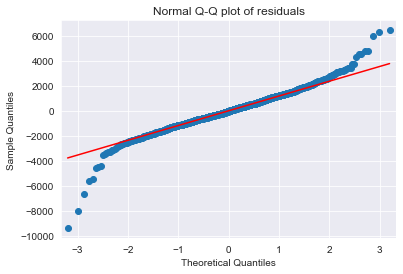

In [22]:
import statsmodels.api as smf
qqplot=smf.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [24]:
#Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

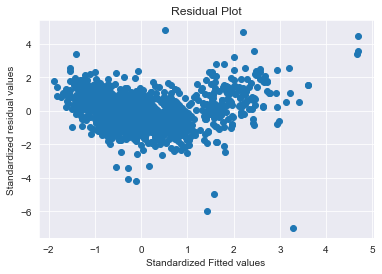

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [27]:
#Residual Vs Regressors

eval_env: 1


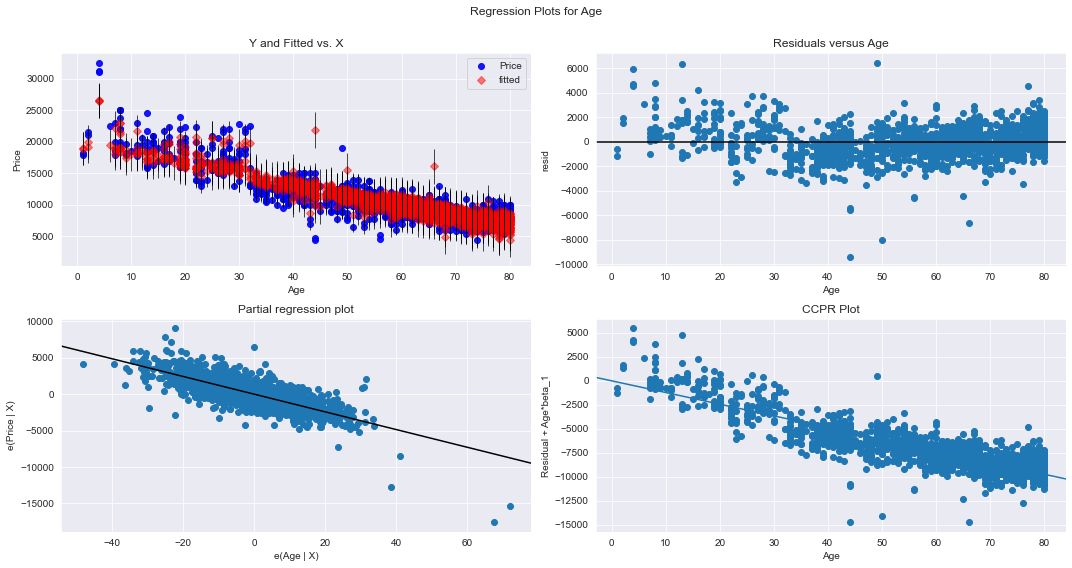

In [28]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


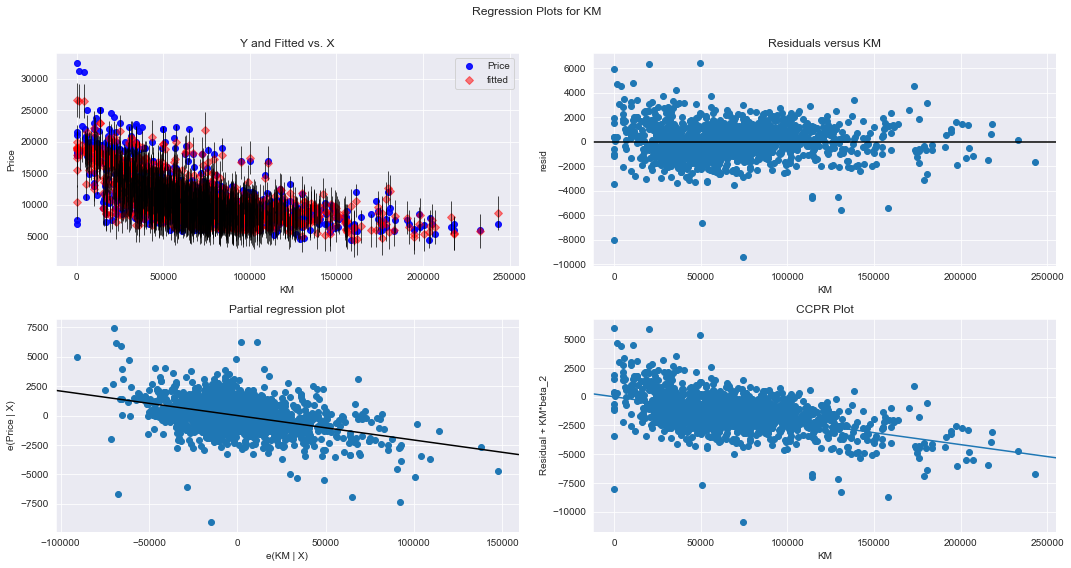

In [29]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "KM", fig=fig) 
plt.show()

eval_env: 1


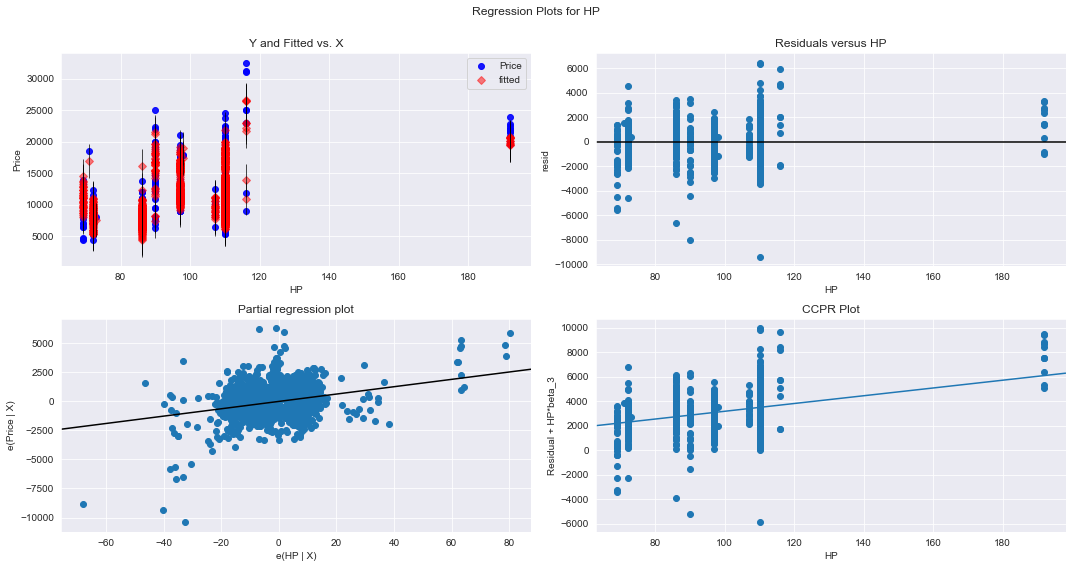

In [30]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "HP", fig=fig) 
plt.show()

eval_env: 1


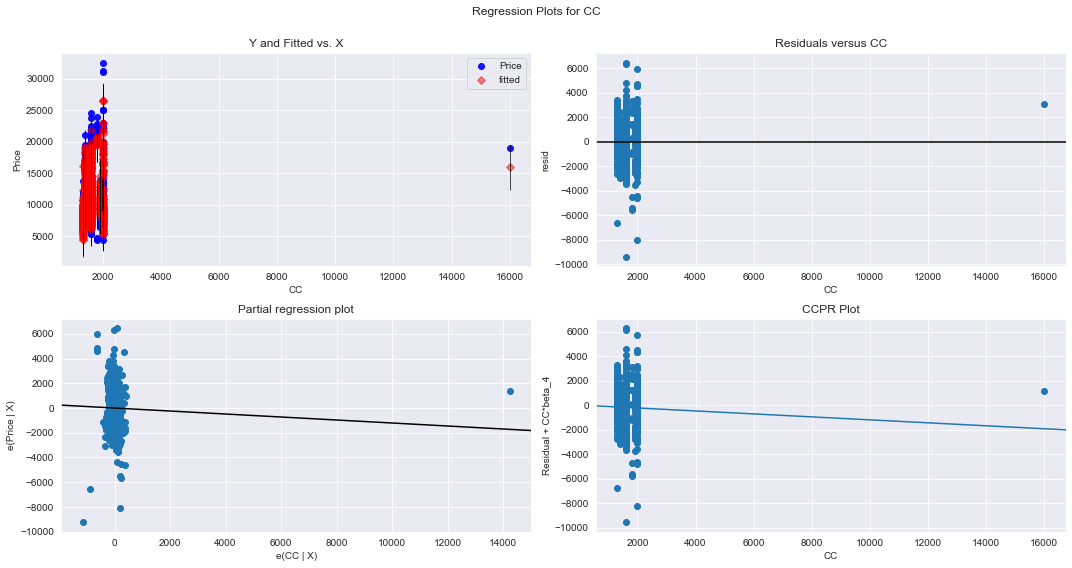

In [31]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "CC", fig=fig) 
plt.show()

eval_env: 1


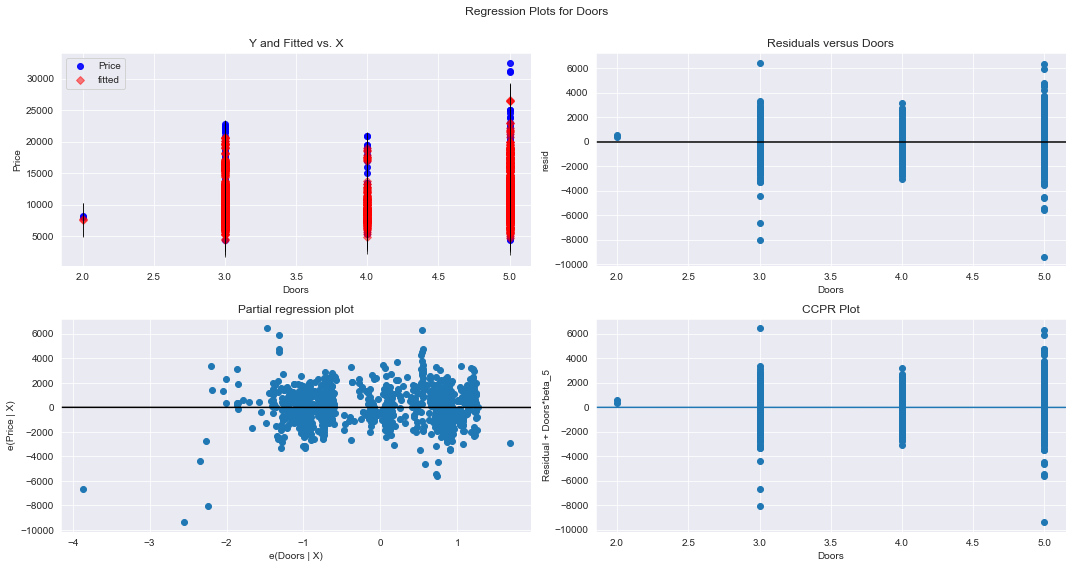

In [32]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Doors", fig=fig) 
plt.show()

eval_env: 1


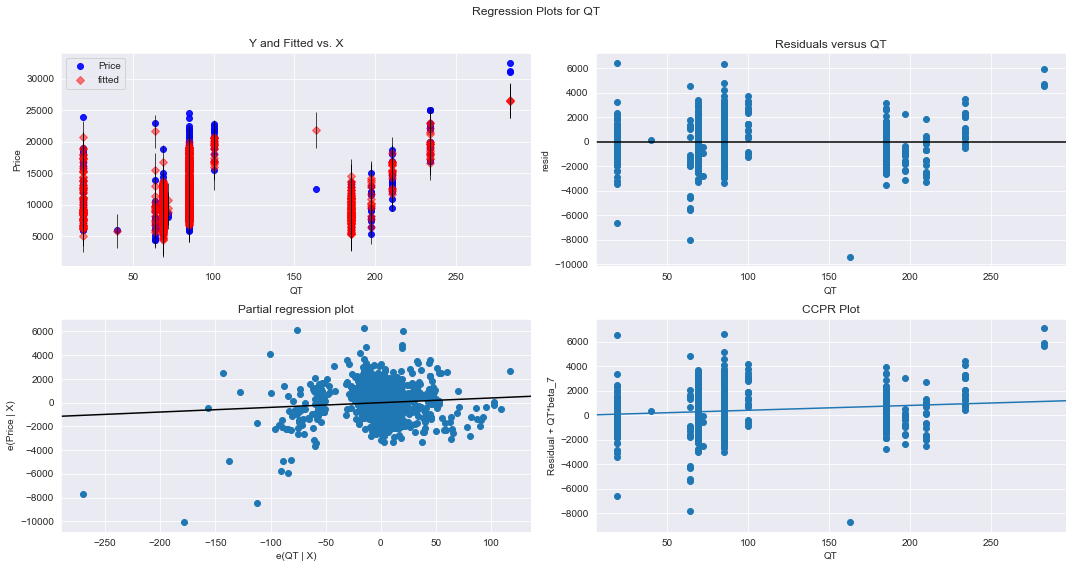

In [33]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "QT", fig=fig) 
plt.show()

eval_env: 1


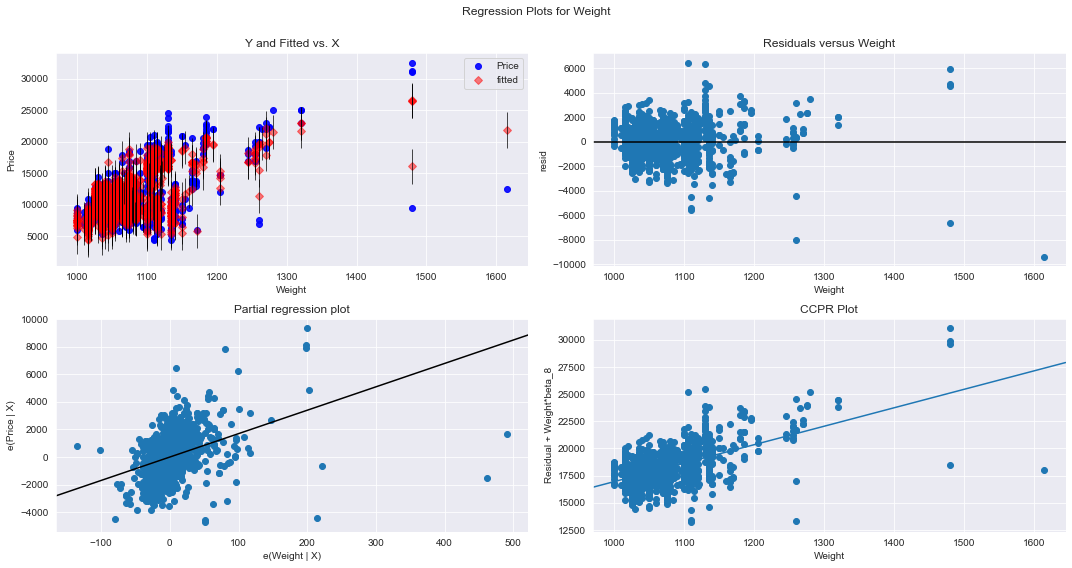

In [34]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Weight", fig=fig) 
plt.show()

In [35]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance

In [36]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

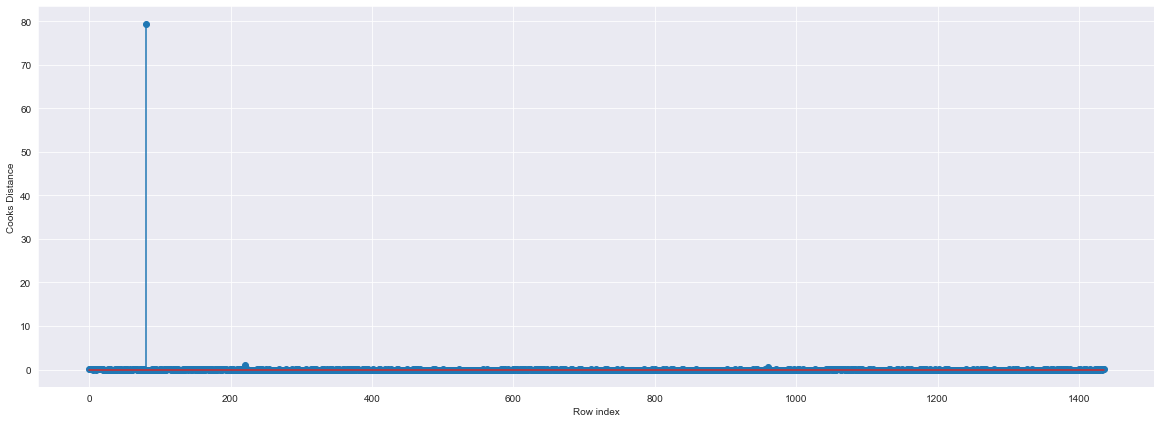

In [37]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624139909)

In [39]:
#High Influence points

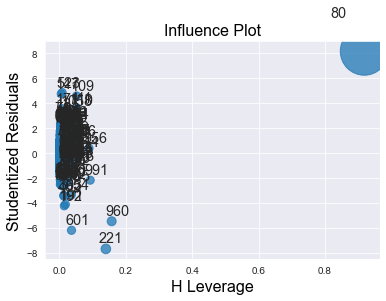

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [41]:
k = 8
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.018802228412256268

In [42]:
#From the above plot, it is evident that data point 80 is the influencer

In [43]:
df[df.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [44]:
#See the differences in Age and other variable values
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [45]:
#Improving the model

In [46]:
df1=df.drop(df.index[80],axis=0).reset_index() 
df1=df1.drop(['index'],axis=1)
df1 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [47]:
#drop the original index 

In [48]:
df1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [49]:
# Build Model

In [50]:
#Exclude variable "CC" and generate R-Squared and AIC values
import statsmodels.formula.api as smf 
final_ml_v=smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data = df).fit() 
final_ml_v

In [51]:
(final_ml_v.rsquared,final_ml_v.aic,final_ml_v.bic) 

(0.8635902364277143, 24768.893819473007, 24811.050753469874)

In [52]:
#Exclude variable "Doors" and generate R-Squared and AIC values
final_ml_v= smf.ols('Price~Age+KM+HP+CC+Gears+QT+Weight',data = df).fit() 

In [53]:
(final_ml_v.rsquared,final_ml_v.aic,final_ml_v.bic)

(0.8637625904386813, 24767.078283372837, 24809.235217369704)

In [54]:
#Cook’s Distance¶

In [55]:
model_influence_v = final_ml_v.get_influence()
(C_v, _) = model_influence_v.cooks_distance

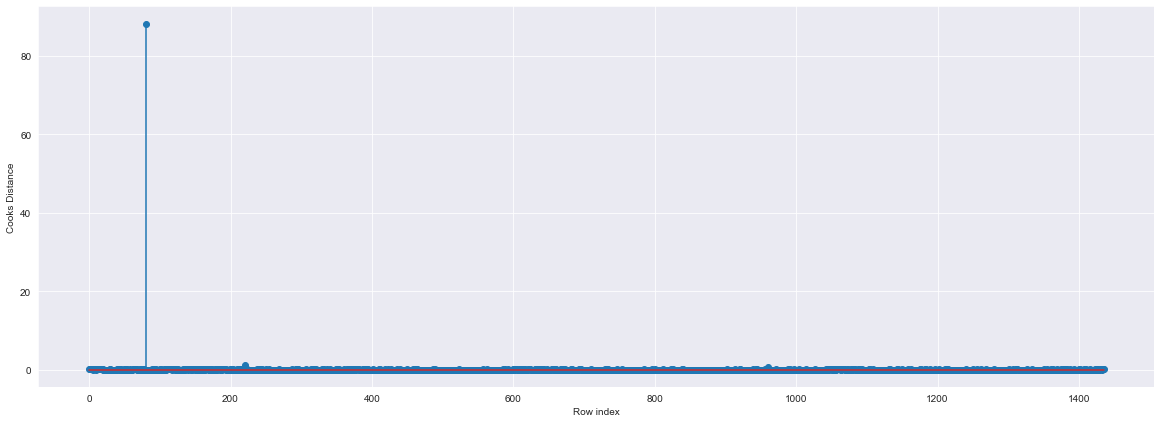

In [56]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(C_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [57]:
#index of the data points where c is more than .5
(np.argmax(C_v),np.max(C_v))  

(80, 88.25985710289542)

In [58]:
#Drop 221
df2=df1.drop(df.index[[221]],axis=0) 

In [59]:
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [60]:
#Reset the index and re arrange the row values
df3=df2.reset_index()  

In [61]:
df4=df3.drop(['index'],axis=1)

In [62]:
df4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [63]:
#Build the model on the new data
final_ml_v = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = df).fit()


In [64]:
#Again check for influencers
model_influence_v = final_ml_v.get_influence()
(c_v, _) = model_influence_v.cooks_distance

In [65]:
# CORREAKLATION MATRIX

In [66]:
#index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

(80, 79.52010624139909)

In [67]:
df5=df4.drop(df1.index[[80]],axis=0) 
df5  

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [68]:
df6=df5.reset_index() 
df6 
#car6=car5.drop(['index'],axis=1

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [69]:
df7=df6.drop(['index'],axis=1) 
df7 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [70]:
#Type Markdown and LaTeX:  𝛼2

In [71]:
#Check the accuracy of the mode
final_ml_v= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = df).fit()


In [72]:
(final_ml_v.rsquared,final_ml_v.aic,final_ml_v.bic) 

(0.8637627463428192, 24769.07664007625, 24816.503190822725)

In [73]:
model_influence_v= final_ml_v.get_influence() 

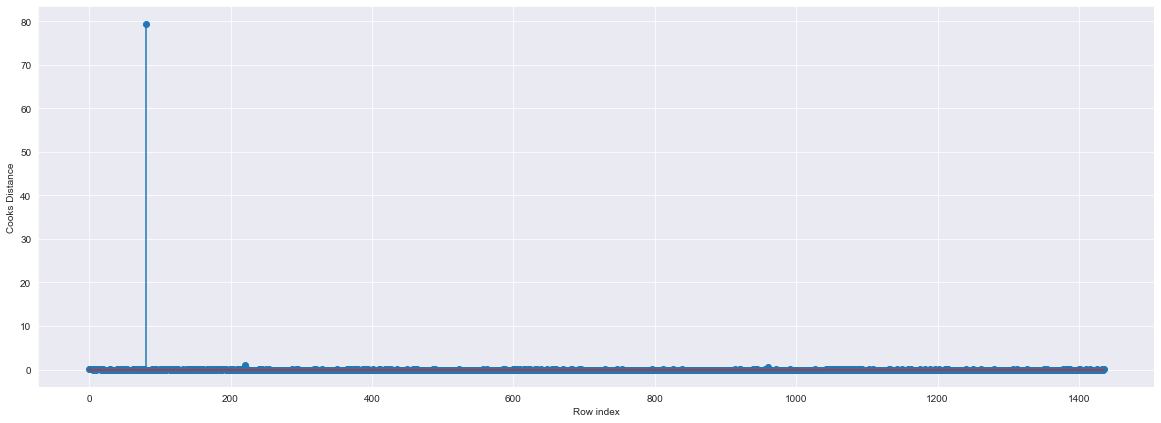

In [74]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,8));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [75]:
(np.argmax(c_v),np.max(c_v))

(80, 79.52010624139909)

In [76]:
#Predicting for new data

In [77]:
#New data for prediction
new_data=pd.DataFrame({'Age':40,"KM":95,"HP":102,"CC":35,"Doors":55,"Gears":60,"QT":90,"Weight":30},index=[1])

In [78]:
#Type Markdown and LaTeX:  𝛼2

In [79]:
final_ml_v.predict(new_data)  

1    29220.250984
dtype: float64

In [80]:
final_ml_v.predict(new_data.iloc[0:9,]) 

1    29220.250984
dtype: float64

In [81]:
final_ml_v.predict(new_data.iloc[0:9,])

1    29220.250984
dtype: float64

In [82]:
pred_y = final_ml_v.predict(new_data)

In [83]:
pred_y 

1    29220.250984
dtype: float64